In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation


In [2]:
from google.colab import drive
drive.mount('/content/drive') 
  

Mounted at /content/drive


In [3]:
# import data set from the local driver 
df =pd.read_csv("drive/My Drive/Colab Notebooks/water_dataset.csv")
df.head() 
  

,Temp,do,ph,co,bod,year
0,29.8,5.7,7.2,189.0,2,2014
1,29.5,6.3,6.9,179.0,1.7,2014
2,29.7,5.8,6.9,64.0,3.8,2014
3,29.5,5.8,7.3,83.0,1.9,2014
4,30,5.5,7.4,81.0,1.5,2014


In [4]:
# applying ffill() method to fill the missing values
df.ffill(axis = 1)  

,Temp,do,ph,co,bod,year
0,29.8,5.7,7.2,189.0,2,2014
1,29.5,6.3,6.9,179.0,1.7,2014
2,29.7,5.8,6.9,64.0,3.8,2014
3,29.5,5.8,7.3,83.0,1.9,2014
4,30,5.5,7.4,81.0,1.5,2014
...,...,...,...,...,...,...
1985,0,7.9,738.0,7.2,2.7,2003
1986,29,7.5,585.0,6.3,2.6,2003
1987,28,7.6,98.0,6.2,1.2,2003
1988,28,7.7,91.0,6.5,1.3,2003


In [5]:
# Count total NaN at each column in a DataFrame 
df.isnull().sum()  

Temp    0
do      0
ph      0
co      0
bod     0
year    0
dtype: int64

In [6]:
# checking the data type of the dataset 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    1990 non-null   object 
 1   do      1990 non-null   float64
 2   ph      1990 non-null   float64
 3   co      1990 non-null   float64
 4   bod     1990 non-null   object 
 5   year    1990 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 93.4+ KB


In [7]:
# making year  as index 
df1= df.set_index('year') 
df1.head() 

,Temp,do,ph,co,bod
year,,,,,
2014,29.8,5.7,7.2,189.0,2
2014,29.5,6.3,6.9,179.0,1.7
2014,29.7,5.8,6.9,64.0,3.8
2014,29.5,5.8,7.3,83.0,1.9
2014,30,5.5,7.4,81.0,1.5


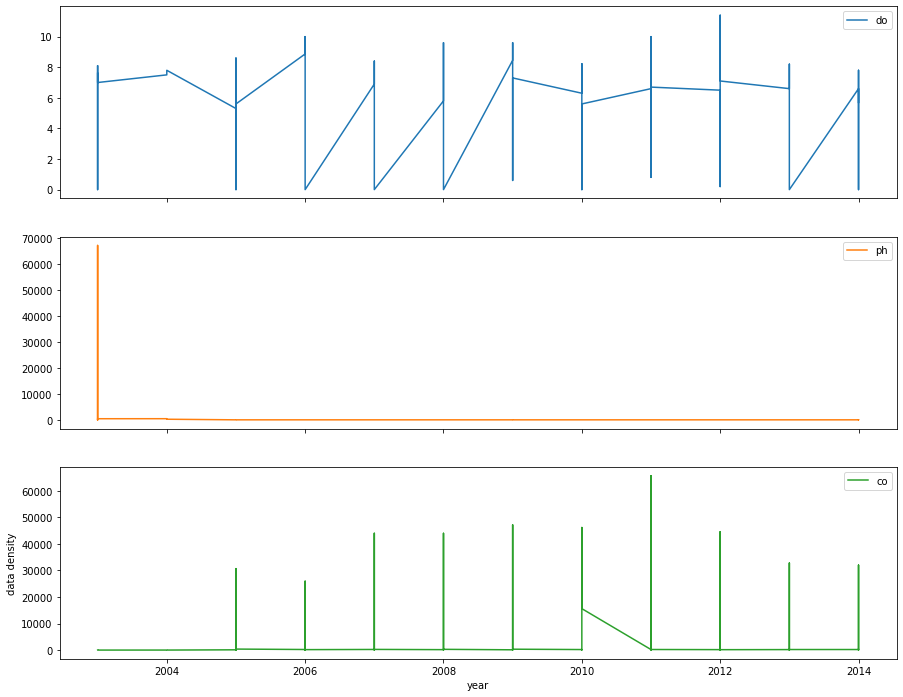

In [8]:
# exploring the data 
# plot the time series and see its pattern. 
df1.plot(figsize=(15,12),subplots=True ) 
plt.ylabel("data density");   

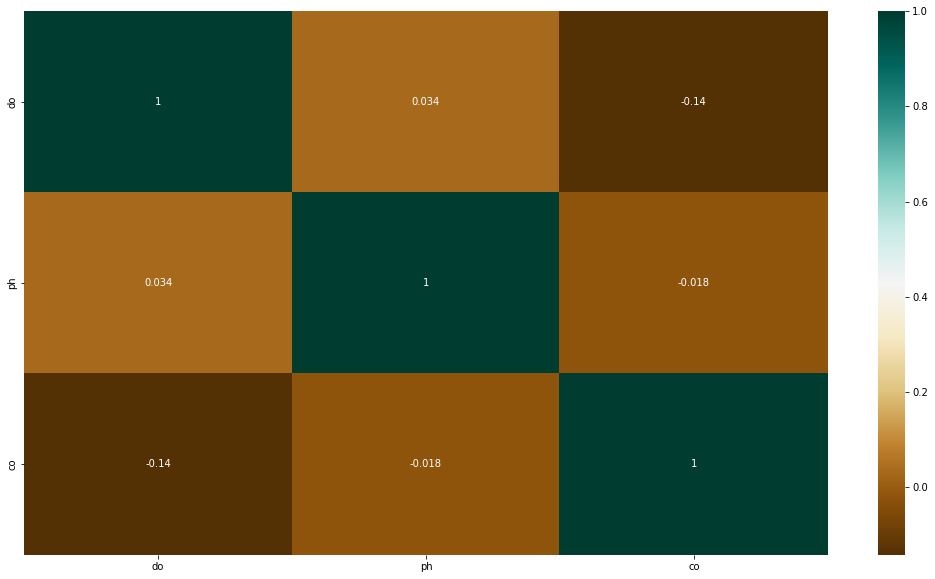

In [9]:
# Finding the relations between the variables using the correlation 
plt.figure(figsize=(18,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True) 
#c   

In [10]:
# # For content length, use the Min max Scalar.  
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['do','ph','co'] 
scaler = MinMaxScaler() 
df1[con_feats] = scaler.fit_transform(df1[con_feats])
df1.head()   

,Temp,do,ph,co,bod
year,,,,,
2014,29.8,0.500000,0.000107,0.002877,2
2014,29.5,0.552632,0.000103,0.002725,1.7
2014,29.7,0.508772,0.000103,0.000974,3.8
2014,29.5,0.508772,0.000109,0.001263,1.9
2014,30,0.482456,0.000110,0.001233,1.5


In [11]:
# One Hot Encode the categorical features in the dataset 

# Get a list of all the columns' names with object dtype  
obj_columns = list(df1.select_dtypes(include=['object']).columns) 
elastic_df3_encoded = pd.get_dummies(data=df1, columns=obj_columns)
elastic_df3_encoded.head(2)   

,do,ph,co,Temp_,Temp_0,Temp_10,Temp_11,Temp_12,Temp_14,Temp_15,...,bod_9.2,bod_9.333,bod_9.4,bod_9.5,bod_9.6,bod_9.7,bod_9.75,bod_9.8,bod_9.875,bod_9.9
year,,,,,,,,,,,,,,,,,,,,,
2014,0.500000,0.000107,0.002877,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0.552632,0.000103,0.002725,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the Data to train and Test  

In [12]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
# Split train data and test data
train_size = int(len(elastic_df3_encoded)*0.8)
train_dataset, test_dataset = elastic_df3_encoded.iloc[:train_size],elastic_df3_encoded.iloc[train_size:]

Dimension of train data:  (1592, 590)
Dimension of test data:  (398, 590)


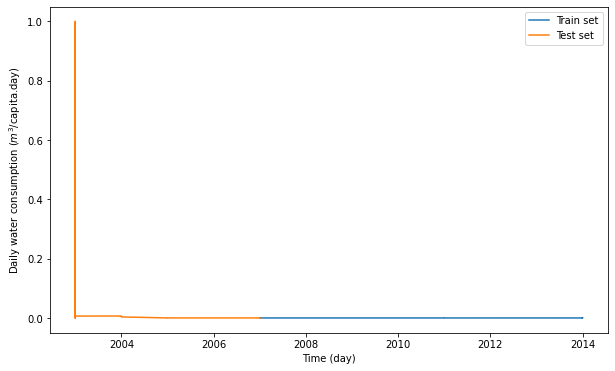

In [13]:
# Plot train and test data
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.ph)
plt.plot(test_dataset.ph)
plt.xlabel('Time (day)')
plt.ylabel('Daily water consumption ($m^3$/capita.day)')
plt.legend(['Train set', 'Test set'], loc='upper right')
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [14]:
# Split train data to X and y
X_train = train_dataset.drop('ph', axis = 1)
y_train = train_dataset.loc[:,['ph']]
# Split test data to X and y
X_test = test_dataset.drop('ph', axis = 1)
y_test = test_dataset.loc[:,['ph']]

In [15]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1592, 589)
(1592, 1)
(398, 589)
(398, 1)


In [16]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test) 

In [17]:
# Create a 3D input
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 100
X_test, y_test = create_dataset(test_x_norm, test_y_norm,   
                                TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, 
                                  TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (298, 100, 589)
y_train.shape:  (1492, 1)
X_test.shape:  (298, 100, 589)
y_test.shape:  (1492, 1)


In [18]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# Create BiLSTM model
# def create_model_bilstm(units):
#     model = Sequential()
#     model.add(Bidirectional(LSTM(units = units,                             
#               return_sequences=True),
#               input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Bidirectional(LSTM(units = units)))
#     model.add(Dense(1))
#     #Compile model
#     model.compile(loss='mse', optimizer='adam')
#     return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# # BiLSTM
# model_bilstm = create_model_bilstm(64)
# GRU and LSTM
model_gru = create_model(64, GRU)
#model_lstm = create_model(64, LSTM)

In [19]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

#history_bilstm = fit_model(model_bilstm)
#history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru) 


Epoch 1/100
38/38 [==============================] - 14s 229ms/step - loss: 0.1113 - val_loss: 0.0112
Epoch 2/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0290 - val_loss: 0.0149
Epoch 3/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0148 - val_loss: 0.0115
Epoch 4/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0137 - val_loss: 0.0094
Epoch 5/100
38/38 [==============================] - 7s 196ms/step - loss: 0.0123 - val_loss: 0.0129
Epoch 6/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0112 - val_loss: 0.0131
Epoch 7/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0108 - val_loss: 0.0109
Epoch 8/100
38/38 [==============================] - 8s 200ms/step - loss: 0.0116 - val_loss: 0.0091
Epoch 9/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0137 - val_loss: 0.0065
Epoch 10/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0229 - val_l

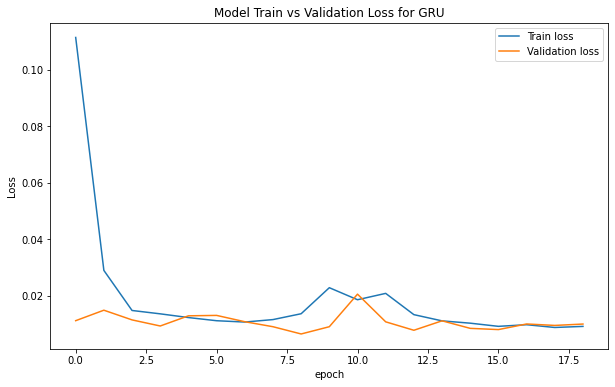

In [20]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

#plot_loss (history_bilstm, 'BiLSTM')
#plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU') 

### Inverse target variable for train and test data 

In [21]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

### Make prediction using GRU 

In [22]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

#prediction_bilstm = prediction(model_bilstm)
#prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

10/10 [==============================] - 1s 56ms/step


### Plot true future vs prediction

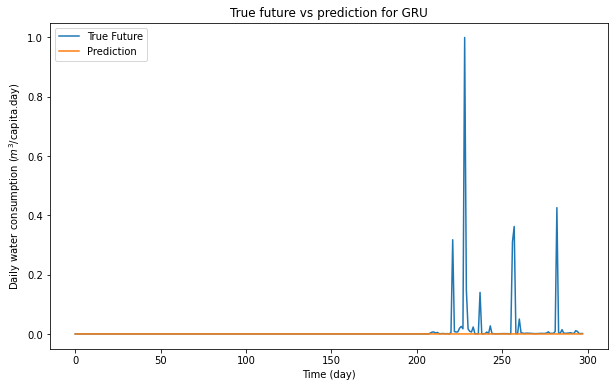

In [23]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily water consumption ($m^3$/capita.day)')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
#plot_future(prediction_bilstm, 'BiLSTM', y_test)
#plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)

In [25]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    #mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Square Error: {:.4f}'.format(mse))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


#evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
#evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

GRU:
Mean Square Error: 0.0052
Root Mean Square Error: 0.0723

